<h2>makemore</h2> takes one text file as input, where each line is assumed to be one training thing, and generates more things like it. Under the hood, it is an autoregressive character-level language model, with a wide choice of models from bigrams all the way to a Transformer (exactly as seen in GPT). For example, we can feed it a database of names, and makemore will generate cool baby name ideas that all sound name-like, but are not already existing names. Or if we feed it a database of company names then we can generate new ideas for a name of a company. Or we can just feed it valid scrabble words and generate english-like babble

In [16]:
file_path = 'names.txt'
content = open(file_path, 'r').read().splitlines()
len(content)

32033

the names.txt contains large no of name which we will pass through NN's


Exlporing the dataset 


In [17]:
#lets first exlpore the dataset:
print(min(len(words) for words in content ))
print(max(len(words) for words in content ))
count = {}
for word in content:
    character = ['<S>'] + list(word) + ['<E>'] #Bigrams
    for n1,n2 in  zip(character,character[1:]):
        bigram = (n1,n2)
        count[bigram] = count.get(bigram,0)+ 1
sorted_item = sorted(count.items() , key= lambda keyvalue : keyvalue[1])       #count max ouccerence
# Print the sliced sorted list
print(sorted_item[1])
print(sorted_item[-1])

2
15
(('d', 'z'), 1)
(('n', '<E>'), 6763)


Mapping words with their indexes (n[index])

In [18]:
import torch
N = torch.zeros((27,27), dtype=torch.int32)
characters = sorted(list(set(''.join(content))))
s_to_i = {s:i+1 for i,s in enumerate(characters)}
s_to_i["."] = 0
# Mapped string to integers

creating bigram 

In [19]:
for word in content:
    character = character = ['.'] + list(word) + ['.'] #Bigrams

    for n11,n22 in zip(character,character[1:]):
        ix1 = s_to_i[n11]
        ix2 = s_to_i[n22]
        N[ix1,ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

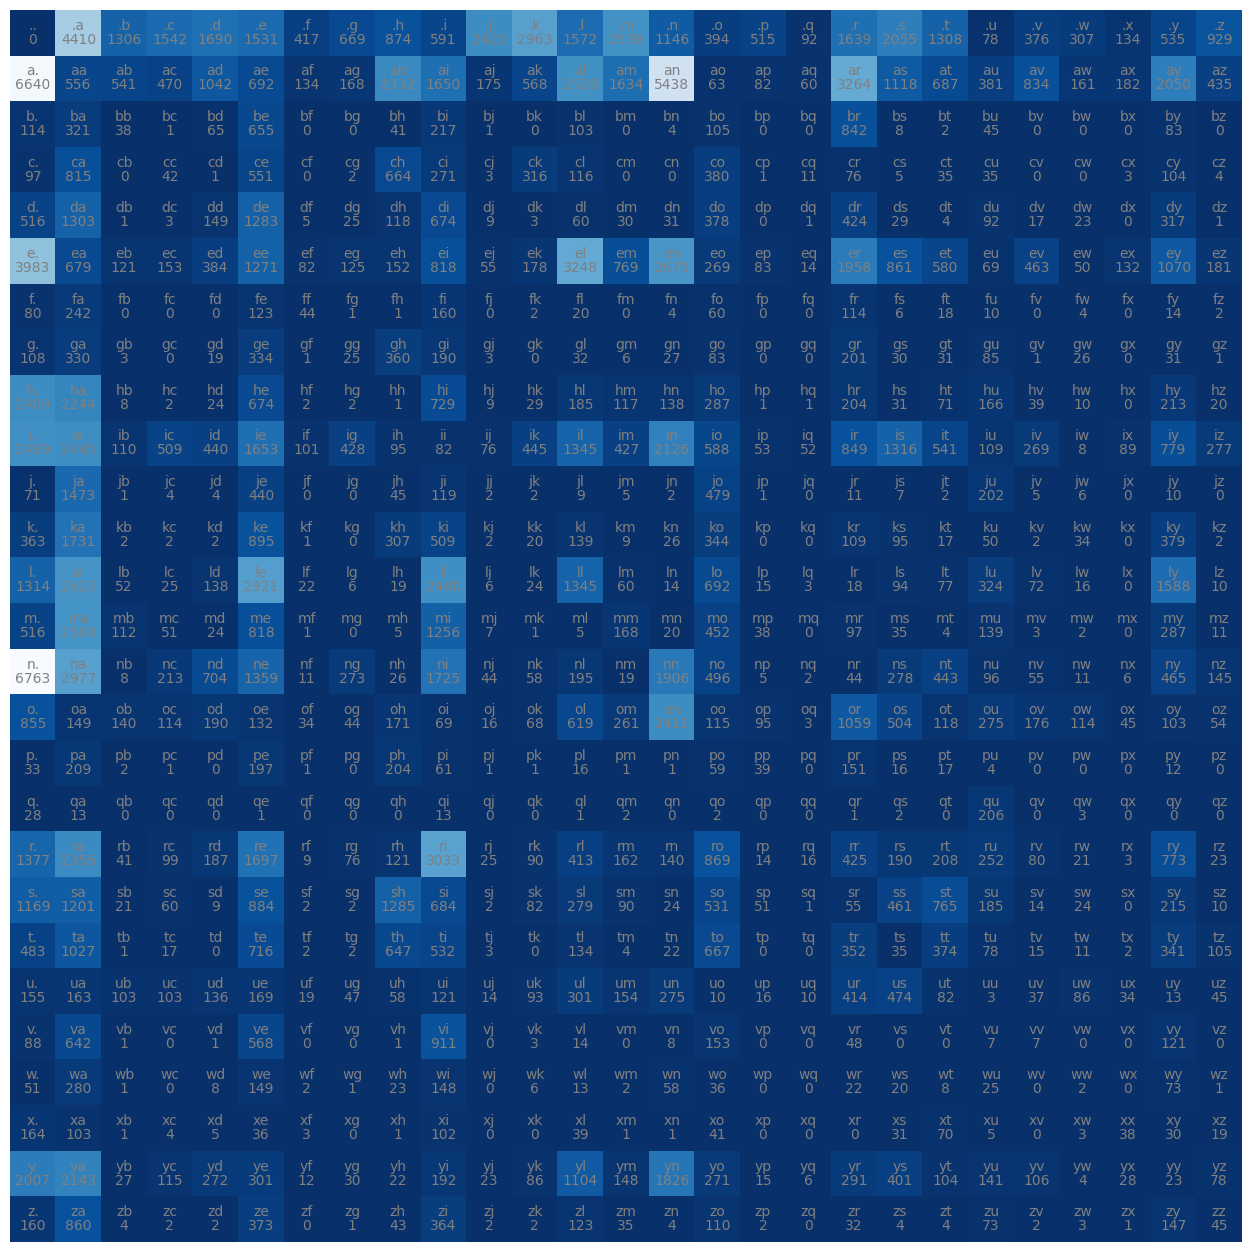

In [20]:
i_to_s = {i:s for s,i in s_to_i.items()}
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues_r')
for i in range(27):
    for j in range(27):
        chstr = i_to_s[i] + i_to_s[j]
        plt.text(j,i , chstr , ha = "center" , va = "bottom" , color = 'gray')
        plt.text(j,i , N[i,j].item() , ha = "center" , va = "top" , color = 'gray')
plt.axis('off')

Sampling the model

In [27]:
genrator = torch.Generator().manual_seed(2147483647)

for i in range(10):
    output = []
    ix = 0
    while True:
        p = N[ix].float()
        probability = p/p.sum()
        ix = torch.multinomial(probability, num_samples = 1 , replacement= True , generator= genrator).item()
        output.append(i_to_s[ix])
        if ix == 0:
          break;
    print(''.join(output))
      
    

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
